### Compare twisted labels(0-4) with origin labels(0-9) in fashion mnist, and find the distribution of the twisted labels by the original labels. So that we could manually adjust our predicted result, which, is definitely cheating.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
train = pd.merge(
    pd.read_csv('./train.csv',  header=0, names=['Id', 'Label'] + [*range(1,785)]).drop(columns=['Id']).drop_duplicates(),
    pd.read_csv('./orig.csv', header=0, names=['LabelOrig'] + [*range(1,785)]).drop_duplicates(),
    how='inner', on=[*range(1,785)])
test = pd.merge(
    pd.read_csv('./testX.csv', header=0, names=['Id'] + [*range(1,785)]), 
    pd.read_csv('./orig.csv', header=0, names=['LabelOrig'] + [*range(1,785)]).drop_duplicates(),
    how='inner', on=[*range(1,785)])
predict = pd.read_csv('./results/resultXGBoost2.csv')

In [18]:
compare = pd.merge(
    pd.DataFrame({'Orig' : train.groupby(['LabelOrig', 'Label']).size()}).reset_index(), 
    pd.DataFrame({'Pred' : pd.merge(test, predict,  how='inner', left_on=['Id'], right_on = ['Id']).groupby(['LabelOrig', 'Label']).size()}).reset_index(),
    how='right', on=['LabelOrig', 'Label'], sort = True).fillna(0).astype('int')
compare

,LabelOrig,Label,Orig,Pred
0,0,0,0,28
1,0,1,534,128
2,0,2,1111,195
3,0,3,1675,239
4,0,4,2402,309
5,1,0,5245,890
6,1,1,261,58
7,1,2,16,5
8,1,3,3,4
9,1,4,1,6


In [19]:
comparePercent = pd.merge(
    pd.DataFrame({'percentOrig' : train.groupby(['LabelOrig', 'Label']).size().groupby(level=0).apply(lambda x: round(100 * x / float(x.sum()), 2))}).reset_index(), 
    pd.DataFrame({'percentPred' : pd.merge(test, predict,  how='inner', left_on=['Id'], right_on = ['Id']).groupby(['LabelOrig', 'Label']).size().groupby(level=0).apply(lambda x: round(100 * x / float(x.sum()), 2))}).reset_index(),
    how='right', on=['LabelOrig', 'Label'], sort = True).fillna(0)
comparePercent

,LabelOrig,Label,percentOrig,percentPred
0,0,0,0.00,3.11
1,0,1,9.33,14.24
2,0,2,19.42,21.69
3,0,3,29.27,26.59
4,0,4,41.98,34.37
5,1,0,94.91,92.42
6,1,1,4.72,6.02
7,1,2,0.29,0.52
8,1,3,0.05,0.42
9,1,4,0.02,0.62


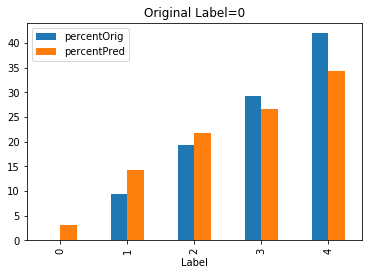

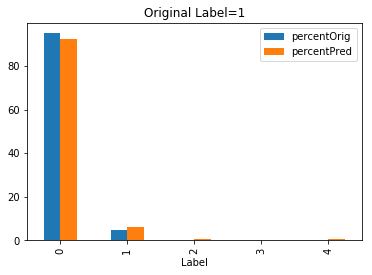

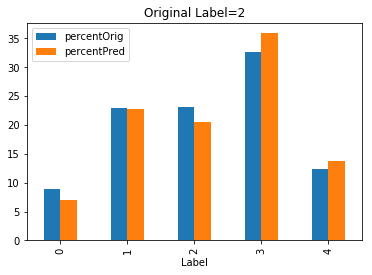

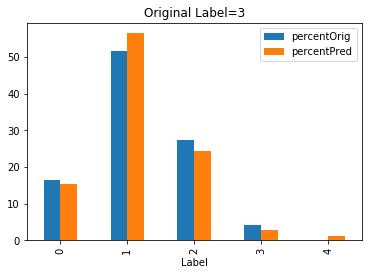

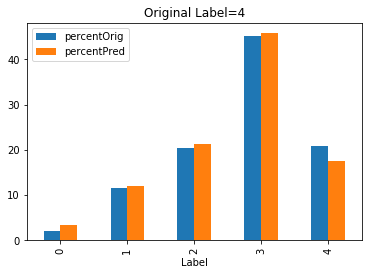

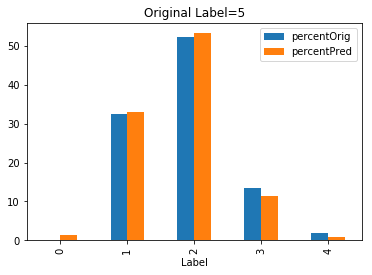

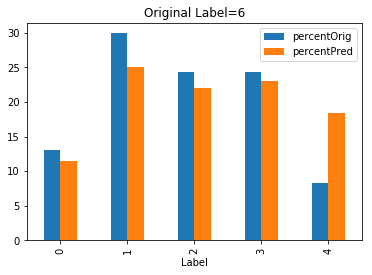

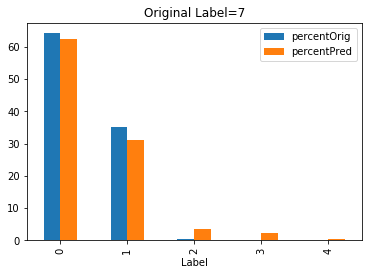

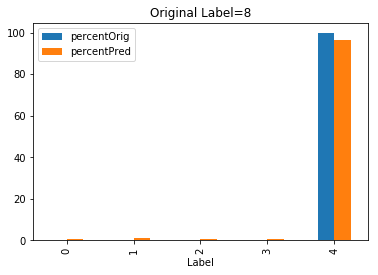

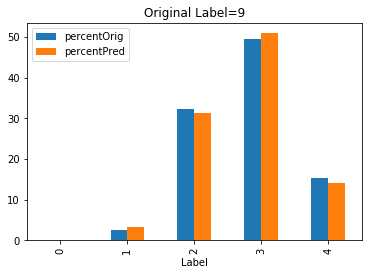

In [36]:
grouped = comparePercent.groupby('LabelOrig')     
for key in grouped.groups.keys():
    ax = grouped.get_group(key).plot.bar(x = 'Label', y = ['percentOrig', 'percentPred'])
    ax.set_title('Original Label=%d'%key)
    ax.legend()
plt.show()

In [2]:
manual = pd.merge(test, predict,  how='right', on=['Id'])

manual.loc[(manual['LabelOrig'] == 0) & (manual['Label'] == 0), 'Label'] = 4
manual.loc[(manual['LabelOrig'] == 5) & (manual['Label'] == 0), 'Label'] = 2
# manual.loc[(manual['LabelOrig'] == 7) & (manual['Label'] == 3), 'Label'] = 0
manual.loc[(manual['LabelOrig'] == 7) & (manual['Label'] == 4), 'Label'] = 0
manual.loc[(manual['LabelOrig'] == 9) & (manual['Label'] == 0), 'Label'] = 3
manual.loc[(manual['LabelOrig'] == 8) & (manual['Label'] == 0), 'Label'] = 4
manual.loc[(manual['LabelOrig'] == 8) & (manual['Label'] == 1), 'Label'] = 4
manual.loc[(manual['LabelOrig'] == 8) & (manual['Label'] == 2), 'Label'] = 4
manual.loc[(manual['LabelOrig'] == 1) & (manual['Label'] == 3), 'Label'] = 0
manual.loc[(manual['LabelOrig'] == 1) & (manual['Label'] == 4), 'Label'] = 0

manual = manual.dropna()
result = manual[['Id', 'Label']]
result.columns = ['Id', 'LabelNew']

In [3]:
for index, row in predict.iterrows():
    if(row['Id'] in result['Id'].unique()):
        row['Label'] = result[result['Id'] == row['Id']].iat[0,1]

In [ ]:
predict.to_csv('manual3.csv', index=False)

### Merge results (for CNN)

In [ ]:
import pandas as pd

In [1]:
dfs = [pd.read_csv('resultXGBoost.csv').drop(columns=['Id']),
       pd.read_csv('resultHGBC.csv').drop(columns=['Id']),
       pd.read_csv('resultSVM2.csv').drop(columns=['Id']),
#        pd.read_csv('resultRandomForest2.csv').drop(columns=['Id'])]
res = pd.concat(dfs, axis=1, sort=False).mode(axis=1)[[0]].astype(int).rename(columns={0: 'Label'})
res.index = res.index.rename('Id')
res.to_csv('combine2.csv', encoding='utf-8')

In [7]:
acc = []
with open("1.csv", "r") as f:
    for line in f:
        tmp = line.split(',')
        acc.append((int(tmp[0]), float(tmp[1])))

acc.sort(key = lambda x: x[1], reverse=True) 
print(acc)

[(35, 0.91358334), (14, 0.9134167), (17, 0.9116667), (9, 0.91125), (21, 0.91116667), (27, 0.91116667), (97, 0.91116667), (58, 0.911), (85, 0.91083336), (54, 0.9105), (32, 0.91008335), (90, 0.9098333), (23, 0.9095), (39, 0.9095), (8, 0.9091667), (15, 0.9088333), (79, 0.90858334), (71, 0.9085), (94, 0.9084167), (7, 0.90816665), (65, 0.90816665), (73, 0.9080833), (43, 0.908), (29, 0.90783334), (55, 0.90783334), (5, 0.90775), (61, 0.9076667), (6, 0.90758336), (40, 0.90758336), (57, 0.90758336), (72, 0.90758336), (37, 0.90741664), (12, 0.9073333), (46, 0.90716666), (16, 0.9069167), (36, 0.9066667), (41, 0.9066667), (68, 0.90641665), (88, 0.90641665), (76, 0.9063333), (60, 0.90625), (18, 0.9061667), (26, 0.9061667), (62, 0.9061667), (86, 0.9061667), (45, 0.90608335), (28, 0.906), (11, 0.9058333), (1, 0.90575), (2, 0.90575), (4, 0.90566665), (63, 0.9055833), (67, 0.9055833), (80, 0.9055833), (66, 0.90541667), (19, 0.90533334), (50, 0.90508336), (96, 0.905), (92, 0.9048333), (69, 0.90466666), 

In [1]:
dfs = [pd.read_csv('./CNN91/resultCNN91' + str(i+1) + '.csv').drop(columns=['Id']) for i in range(27)] 
res = pd.concat(dfs, axis=1, sort=False).mode(axis=1)[[0]].astype(int).rename(columns={0: 'Label'})
res.index = res.index.rename('Id')
res.to_csv('combineCNN27.csv', encoding='utf-8')

In [2]:
dfs = [pd.read_csv('./CNN1/resultCNN1' + str(i) + '.csv').drop(columns=['Id']) for i in range(1,10)] 
res = pd.concat(dfs, axis=1, sort=False).mode(axis=1)[[0]].astype(int).rename(columns={0: 'Label'})
res.index = res.index.rename('Id')
res.to_csv('combineCNN9.csv', encoding='utf-8')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau
from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform
%matplotlib inline

In [ ]:
df = pd.read_csv('train.csv').drop(columns=['Id'])
def data():
    X_train, X_val, y_train, y_val = train_test_split(MinMaxScaler().fit_transform(df.iloc[:,1:]).reshape((-1, 28, 28, 1)), to_categorical(df.iloc[:,0], num_classes=5), test_size=0.2)
    return X_train, y_train, X_val, y_val

def gen_csv(model, name):
    result = dfTest[['Id']].copy()
    result['Label'] = model.predict_classes(MinMaxScaler().fit_transform(dfTest.iloc[:,1:]).reshape((-1, 28, 28, 1)))
    result.to_csv('result' + name + '.csv', encoding='utf-8', index=False)

In [ ]:
dfTest = pd.read_csv('testX.csv')
count = 10
while count < 100:
    X_train, y_train, X_val, y_val = data()
    model = Sequential([
        Conv2D(32, kernel_size=3, activation='relu',padding='same', input_shape=(28,28,1)),
        Conv2D(32, kernel_size=3, activation='relu',padding='same'),
        MaxPool2D(pool_size=2,strides=2),
        Dropout(0.13243678),
        Conv2D(64, kernel_size=3, activation='relu'),
        Conv2D(64, kernel_size=3, activation='relu'),
        BatchNormalization(),
        MaxPool2D(pool_size=2,strides=2),
        Dropout(0.25767502),
        Flatten(),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.31440486),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.12715375),
        Dense(5, activation='softmax')
    ])
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adam(lr=0.001))
    model.fit(X_train, y_train, batch_size=128, epochs=40, verbose=0, validation_data=(X_val, y_val), callbacks = [reduce_lr])
    score, acc = model.evaluate(X_val, y_val, verbose=0)
    if(acc >= 0.9):
        print('Val accuracy:', acc)
        gen_csv(model, 'CNN1' + str(count))
        count += 1

Val accuracy: 0.90575
Val accuracy: 0.90575
Val accuracy: 0.9015
Val accuracy: 0.90566665
Val accuracy: 0.90775
Val accuracy: 0.90758336
Val accuracy: 0.90816665
Val accuracy: 0.9091667
Val accuracy: 0.91125
Val accuracy: 0.9008333
Val accuracy: 0.9058333
Val accuracy: 0.9073333
Val accuracy: 0.9045
Val accuracy: 0.9134167
Val accuracy: 0.9088333
Val accuracy: 0.9069167
Val accuracy: 0.9116667
Val accuracy: 0.9061667
Val accuracy: 0.90533334
Val accuracy: 0.9035
Val accuracy: 0.91116667
Val accuracy: 0.90175
Val accuracy: 0.9095
Val accuracy: 0.90316665
Val accuracy: 0.90433335
Val accuracy: 0.9061667
Val accuracy: 0.91116667
Val accuracy: 0.906
Val accuracy: 0.90783334
Val accuracy: 0.90358335
Val accuracy: 0.9005833
Val accuracy: 0.91008335
Val accuracy: 0.90416664
Val accuracy: 0.90208334
Val accuracy: 0.91358334
Val accuracy: 0.9066667
Val accuracy: 0.90741664
Val accuracy: 0.90008336
Val accuracy: 0.9095
Val accuracy: 0.90758336
Val accuracy: 0.9066667
Val accuracy: 0.9023333
Val 

In [3]:
dfTest = pd.read_csv('testX.csv')
count = 1
while count < 30:
    X_train, y_train, X_val, y_val = data()
    model = Sequential([
        Conv2D(32, kernel_size=3, activation='relu',padding='same', input_shape=(28,28,1)),
        Conv2D(32, kernel_size=3, activation='relu',padding='same'),
        MaxPool2D(pool_size=2,strides=2),
        Dropout(0.13243678),
        Conv2D(64, kernel_size=3, activation='relu'),
        Conv2D(64, kernel_size=3, activation='relu'),
        BatchNormalization(),
        MaxPool2D(pool_size=2,strides=2),
        Dropout(0.25767502),
        Flatten(),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.31440486),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.12715375),
        Dense(5, activation='softmax')
    ])
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adam(lr=0.001))
    model.fit(X_train, y_train, batch_size=128, epochs=40, verbose=0, validation_data=(X_val, y_val), callbacks = [reduce_lr])
    score, acc = model.evaluate(X_val, y_val, verbose=0)
    if(acc >= 0.91):
        print('Val accuracy:', acc)
        gen_csv(model, 'CNN91' + str(count))
        count += 1

Val accuracy: 0.91116667
Val accuracy: 0.91141665
Val accuracy: 0.91025
Val accuracy: 0.91066664
Val accuracy: 0.91025
Val accuracy: 0.9101667
Val accuracy: 0.91183335
Val accuracy: 0.9109167
Val accuracy: 0.91116667
Val accuracy: 0.91041666
Val accuracy: 0.9105833
Val accuracy: 0.9159167
Val accuracy: 0.91041666
Val accuracy: 0.9105
Val accuracy: 0.91008335
Val accuracy: 0.911


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/jtk/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-bbe6d9d8c63e>", line 26, in <module>
    model.fit(X_train, y_train, batch_size=128, epochs=40, verbose=0, validation_data=(X_val, y_val), callbacks = [reduce_lr])
  File "/home/jtk/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/tensorflow_core/python/keras/engine/training.py", line 819, in fit
    use_multiprocessing=use_multiprocessing)
  File "/home/jtk/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/tensorflow_core/python/keras/engine/training_v2.py", line 395, in fit
    total_epochs=1)
  File "/home/jtk/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/tensorflow_core/python/keras/engine/training_v2.py", line 128, in run_one_epoch
    batch_outs = execution_function(iterator)
  File "/home/jtk/anaconda3/envs/tf_gpu/lib/python3.7/site-packa

KeyboardInterrupt: 